In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.rc('axes', titlesize=16, labelsize=16) 
plt.rc('legend', fontsize=16)

position_x = np.array([])
position_y = np.array([])
velocity_x = np.array([])
velocity_y = np.array([])
acceleration_x = np.array([])
acceleration_y = np.array([])
time_stamp_ms = np.array([])

with open('lab3data.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
#         elif row[7] == '' and row[8] == '':
#             position_x = np.append(position_x, float(row[5]))
#             position_y = np.append(position_y, float(row[6]))
#             velocity_x = np.append(velocity_x, 0)
#             velocity_y = np.append(velocity_y, 0)
#             acceleration_x = np.append(acceleration_x, 0)
#             acceleration_y =np.append(acceleration_y, 0)
            
#             time_stamp_ms = np.append(time_stamp_ms, float(row[1]))
        else:
            position_x = np.append(position_x, float(row[5]))
            position_y = np.append(position_y, float(row[6]))
            velocity_x = np.append(velocity_x, float(row[7]))
            velocity_y = np.append(velocity_y, float(row[8]))
            acceleration_x = np.append(acceleration_x, float(row[9]))
            acceleration_y =np.append(acceleration_y, float(row[10]))
    
    
            
            
            
            time_stamp_ms = np.append(time_stamp_ms, float(row[1]))
            
time_stamp_s = time_stamp_ms / 1000

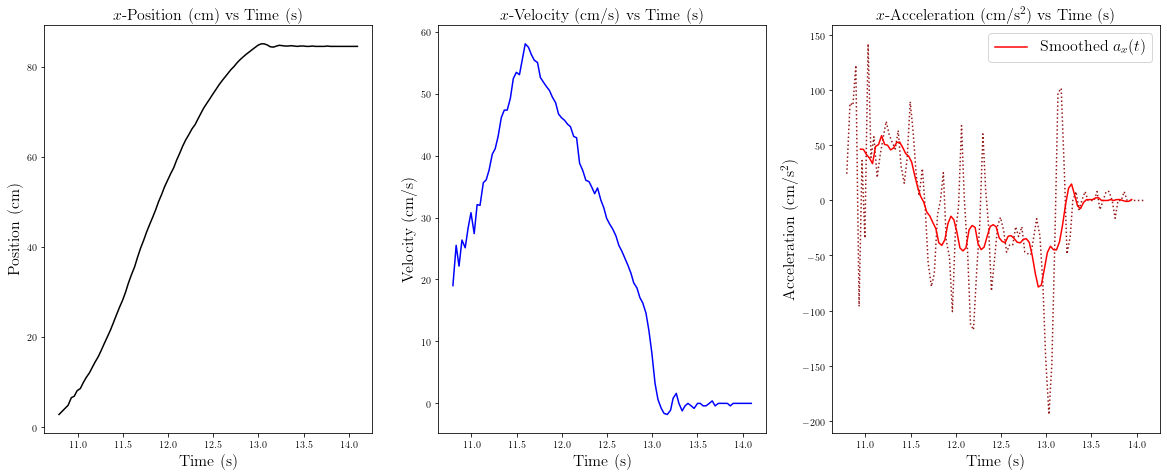

In [7]:
fig, (rx, vx, ax) = plt.subplots(1, 3, figsize=(20, 7.5))
# plt.tight_layout()

#  x Position Graph
x = time_stamp_s
y1 = position_x
y1_smoothed = moving_average(y1, 3)
x_smoothed = moving_average(time_stamp_s, 3)

rx.set_title('$x$-Position (cm) vs Time (s)')
rx.set_xlabel('Time (s)')
rx.set_ylabel('Position (cm)')
rx.plot(x, y1, color='k')

#  x Velocity Graph
x = time_stamp_s
y2 = velocity_x
y2_smoothed = moving_average(y2, 3)
x_smoothed = moving_average(time_stamp_s, 3)

vx.set_title('$x$-Velocity (cm/s) vs Time (s)')
vx.set_xlabel('Time (s)')
vx.set_ylabel('Velocity (cm/s)')
vx.plot(x, y2, color='b')

#  x Velocity Graph
x = time_stamp_s
y3 = acceleration_x
y3_smoothed = moving_average(y3, 10)
x_smoothed = moving_average(time_stamp_s, 10)

ax.set_title('$x$-Acceleration (cm/s$^2$) vs Time (s)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (cm/s$^2$)')
ax.plot(x, y3, color='#8b0000', alpha=0.9, linestyle='dotted')
ax.plot(x_smoothed, y3_smoothed, color='r', label='Smoothed $a_x(t)$')

ax.legend()

plt.savefig('x_motion.svg')


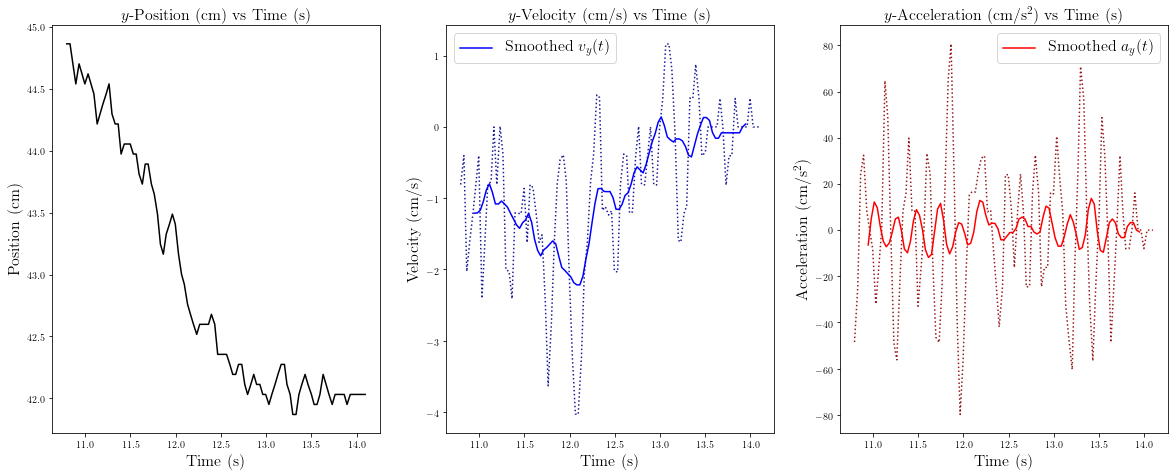

In [8]:
fig, (ry, vy, ay) = plt.subplots(1, 3, figsize=(20, 7.5))
# plt.tight_layout()

#  y Position Graph
x = time_stamp_s
y1 = position_y
y1_smoothed = moving_average(y1, 3)

ry.set_title('$y$-Position (cm) vs Time (s)')
ry.set_xlabel('Time (s)')
ry.set_ylabel('Position (cm)')
ry.plot(x, y1, color='k')

#  y Velocity Graph
x = time_stamp_s
y2 = velocity_y
y2_smoothed = moving_average(y2, 10)
x_smoothed = moving_average(time_stamp_s, 10)

vy.set_title('$y$-Velocity (cm/s) vs Time (s)')
vy.set_xlabel('Time (s)')
vy.set_ylabel('Velocity (cm/s)')
vy.plot(x, y2, color='#00008b', alpha=0.9, linestyle='dotted')
vy.plot(x_smoothed, y2_smoothed, color='b', label='Smoothed $v_y(t)$')

vy.legend()

#  y Velocity Graph
x = time_stamp_s
y3 = acceleration_y
y3_smoothed = moving_average(y3, 10)
x_smoothed = moving_average(time_stamp_s, 10)


ay.set_title('$y$-Acceleration (cm/s$^2$) vs Time (s)')
ay.set_xlabel('Time (s)')
ay.set_ylabel('Acceleration (cm/s$^2$)')
ay.plot(x, y3, color='#8b0000', alpha=0.9, linestyle='dotted')
ay.plot(x_smoothed, y3_smoothed, color='r', label='Smoothed $a_y(t)$')

ay.legend()

plt.savefig('y_motion.svg')

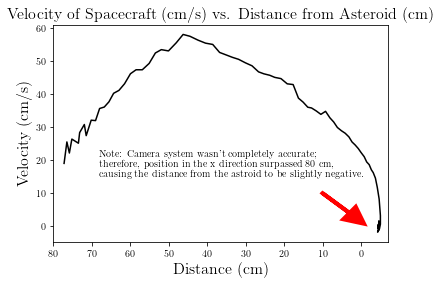

In [9]:
x1 = 80 - position_x
y1 = velocity_x
plt.tight_layout()
plt.plot(x1, y1, color='black')
plt.xlim(80, -7)
plt.arrow(10, 10, -7, -6, head_width=5, head_length=5, fc='r', ec='r', linewidth='4')
plt.xlabel('Distance (cm)')
plt.ylabel('Velocity (cm/s)')
plt.title('Velocity of Spacecraft (cm/s) vs. Distance from Asteroid (cm)')
plt.text(68, 15, 'Note: Camera system wasn\'t completely accurate; \ntherefore, position in the x direction surpassed 80 cm, \ncausing the distance from the astroid to be slightly negative.')

plt.savefig('velocity_vs_distance.svg')